# Introduction
We used this dataset which we found on Kaggle (https://www.kaggle.com/datasets/salehahmedrony/global-food-prices/data?select=wfp_food_prices_database.csv)

## Project Goals

## Data Analysis

In [24]:
import numpy as np
import matplotlib as matplt
import matplotlib.pyplot as plt
import datetime
from datetime import date
from datetime import datetime as dt
import seaborn as sns
import unittest
import json

In [25]:
""" 
Due to the csv file containing hundreds of thousands lines of data, it is not compatible to be directly uploaded to github, which we are using for version control.
Our work around that we are using here, is that we are saving it with in a zip file (which therefore takes up less storage space).  We open the zipfile, extract the
information from the csv, to create the pandas dataframe, before we remove the extracted csv.

"""

import os
import pandas as pd
from zipfile import ZipFile

#upzip
zf = ZipFile('archive.zip', 'r')
zf.extract('wfp_food_prices_database.csv')
zf.close()

#create dataframe
df = pd.read_csv('wfp_food_prices_database.csv')
# remove csv file
os.remove('wfp_food_prices_database.csv')
df.head(5)

C:\Users\gigaw\AppData\Local\Temp\ipykernel_4220\2916857705.py:18: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wfp_food_prices_database.csv')


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## How are we cleaning the data?
 We only want the retail price of each good, given this is the price that the consumer sees each good at. Additionally, we found that the dataset had 1.4 million data entries for retail prices, while the other categories (ex. farmgate, wholesale, producer) had under 14 thousand entries.
 
 We also want so that we work with the data per item in each country. We want to combine the mp_month and mp_year into a single datetime tuple. When creating each date time object we assume that data was consisted collected on the 1st of every month.

In [26]:
#  Only keep rows with retail prices
df = df[df['pt_name'] == 'Retail']

In [27]:
# Create Datetime object for each row
# Isolate just the month and date of each row
tempDayMonthDF = df.loc[:, 'mp_month':'mp_year']

# Define a temp method for creating a datetime object from a row of our dataframe
def _create_datetime(row):
    return datetime.date(row[1], row[0], 1)

# Add new datetime row to the dataframe
tempDayMonthDF = tempDayMonthDF.apply(_create_datetime, axis=1)
df.insert(0, "Date", tempDayMonthDF)
df.head()

C:\Users\gigaw\AppData\Local\Temp\ipykernel_4220\5522395.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return datetime.date(row[1], row[0], 1)


,Date,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,2014-01-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,2014-02-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,2014-03-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,2014-04-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,2014-05-01,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [28]:
# Drop unecessary columns
df = df.drop(columns=['adm0_id','adm1_id','cm_id', 'cur_id', 'mp_commoditysource', 'um_id', 'mp_month', 'mp_year', 'pt_name', 'pt_id', 'mkt_id'])
df.head()

,Date,adm0_name,adm1_name,mkt_name,cm_name,cur_name,um_name,mp_price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.0


In [29]:
"""
Rename column names to more be more readable.
adm0_name -> Country
adm1_name -> Province/State
mkt_name -> City
cm_name -> Product Name
cur_name -> currency
um_name -> Units of Measurement
mp_price -> Market Price

"""
df = df.rename(columns={'adm0_name': 'Country', 'adm1_name': 'Province/State', 'mkt_name': 'City', 'cm_name':'Product Name','cur_name': 'Currency', 'um_name': 'Units of Measurement', 'mp_price': 'Market Price'})
df

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,KG,50.00
...,...,...,...,...,...,...,...,...
1560546,2017-09-01,Zimbabwe,Midlands,Vhugwi,"Sugar (white, fortified) - Retail",USD,KG,1.50
1560547,2018-03-01,Zimbabwe,Midlands,Murowa,Beans - Retail,USD,KG,2.80
1560548,2018-03-01,Zimbabwe,Midlands,Murowa,Maize - Retail,USD,KG,0.40
1560549,2018-03-01,Zimbabwe,Midlands,Murowa,Oil (vegetable) - Retail,USD,L,2.35


In [30]:
# Edit data in Product Name to exclude " - Retail"
df['Product Name'] = df['Product Name'].apply(lambda x: x.removesuffix(' - Retail'))
df

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
0,2014-01-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
1,2014-02-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
2,2014-03-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
3,2014-04-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
4,2014-05-01,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,KG,50.00
...,...,...,...,...,...,...,...,...
1560546,2017-09-01,Zimbabwe,Midlands,Vhugwi,"Sugar (white, fortified)",USD,KG,1.50
1560547,2018-03-01,Zimbabwe,Midlands,Murowa,Beans,USD,KG,2.80
1560548,2018-03-01,Zimbabwe,Midlands,Murowa,Maize,USD,KG,0.40
1560549,2018-03-01,Zimbabwe,Midlands,Murowa,Oil (vegetable),USD,L,2.35


### ** End of basic dataset cleanup **

## Notes: Currency Exchange
One of our goals was to be able to compare the change in price of a product throughout various countries.  In order to do this, we would need to standarize the currency (we opted for USD).  While Looking into currency exchange rates, and the currencies that exist in our table we found datpoints of currencies that are no longer in circulation.
This includes: BYR (Belarus), MRO (Mauritania), NIS (Israel), SLL (Sierra Leone), and VEF (Venezuela).

The currency exchange rate api we used (https://www.exchangerate-api.com/) does not have all the datapoints we need for these out of cirrculation currencies.
To that end, we found the exchange rate from the non-existent currencies to current circulating currencies of said countries, and have updated our main dataframe to reflect the equivalent of the current currencies, if the currency was previously in circulation and went out of circulation during the timeframe our data has sampled.

BYR (Belarus second ruble) used from 2000-2016.
MRO (Mauritanian First Ouguiya) used from 1973-December 2017.
ILS (Israeli Shekel) used from 1980-1985.
SLL (First Sierra Leone Leone) used from 1964-2022?
VEF (Venezuelan Bolivar) used from 1983-2008
VES (Venezuelan Bolivar) used from 2008-2021.


Exchange rates:

- 1 BYN = 10,000 BYR
- 1 MRU = 10 MRO
- 1 ILS = 1 NIS
- 1 SLE = 1000 SLL
- 1 VES = 100,000 VEF

In essence: we are trying to make sure our database's currency can match up with the currency exchange rate api available currencies.

As stated, some currencies weren't in circulation or are currently no longer in circulation. We found the API we used is limited by this factor.  Therefore, some data will not have acityCounturate used accurate exchange rates for a given currency before a certain time period.

1. The Datapoint of a product's market value (from our main dataframe) was collected on a date unknown to the API, most commonly before the API's starting date (January 1, 1999) ex. 1990/1/1

How we solved this issue: 
- Find the next closest datapoint: find the nearest date in the exchange rate json that contains the given currency.

In [31]:
# BYN - convert based on date(?)
#2016-06-01 is the last entry of BYR
#2016-07-01 is the first entry of BYN


mask1 = df['Currency'] == 'BYR'
mask2 = df['Date'] >= datetime.date(2016, 7, 1)
masked = df[mask1&mask2]
display(masked)

masked['Market Price'] /= 10000
masked['Currency'] = masked['Currency'].replace('BYR', 'BYN')
display(masked)

df[mask1&mask2] = masked
display(df[mask1&mask2])

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
145255,2016-07-01,Belarus,Minsk City,Minsk,Wheat flour,BYR,KG,0.96
145256,2016-08-01,Belarus,Minsk City,Minsk,Wheat flour,BYR,KG,0.99
145257,2016-09-01,Belarus,Minsk City,Minsk,Wheat flour,BYR,KG,0.97
145258,2016-10-01,Belarus,Minsk City,Minsk,Wheat flour,BYR,KG,0.99
145259,2016-11-01,Belarus,Minsk City,Minsk,Wheat flour,BYR,KG,1.01
...,...,...,...,...,...,...,...,...
145568,2019-12-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYR,KG,2.87
145569,2020-01-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYR,KG,2.89
145570,2020-02-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYR,KG,2.88
145571,2020-04-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYR,KG,3.15


C:\Users\gigaw\AppData\Local\Temp\ipykernel_4220\4013605670.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masked['Market Price'] /= 10000
C:\Users\gigaw\AppData\Local\Temp\ipykernel_4220\4013605670.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masked['Currency'] = masked['Currency'].replace('BYR', 'BYN')


,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
145255,2016-07-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000096
145256,2016-08-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000099
145257,2016-09-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000097
145258,2016-10-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000099
145259,2016-11-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000101
...,...,...,...,...,...,...,...,...
145568,2019-12-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000287
145569,2020-01-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000289
145570,2020-02-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000288
145571,2020-04-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000315


,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
145255,2016-07-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000096
145256,2016-08-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000099
145257,2016-09-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000097
145258,2016-10-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000099
145259,2016-11-01,Belarus,Minsk City,Minsk,Wheat flour,BYN,KG,0.000101
...,...,...,...,...,...,...,...,...
145568,2019-12-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000287
145569,2020-01-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000289
145570,2020-02-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000288
145571,2020-04-01,Belarus,Minsk City,Minsk,Bread (high grade flour),BYN,KG,0.000315


In [32]:
# Rename ILS to NIS - all api data is in ILS
# display(df[df['Currency'] == 'ILS'])
df['Currency'] = df['Currency'].replace('NIS', 'ILS')
# display(df[df['Currency'] == 'NIS'])

In [33]:
display(df[df['Currency'] == 'ILS'])

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price
1283537,2007-01-01,State of Palestine,Gaza,Gaza,Bread,ILS,KG,2.0
1283538,2007-02-01,State of Palestine,Gaza,Gaza,Bread,ILS,KG,2.0
1283539,2007-03-01,State of Palestine,Gaza,Gaza,Bread,ILS,KG,2.0
1283540,2007-04-01,State of Palestine,Gaza,Gaza,Bread,ILS,KG,2.0
1283541,2007-05-01,State of Palestine,Gaza,Gaza,Bread,ILS,KG,2.0
...,...,...,...,...,...,...,...,...
1302620,2020-03-01,State of Palestine,Tulkarm,Tulkarem,Water (drinking),ILS,Cubic meter,2.5
1302621,2020-04-01,State of Palestine,Tulkarm,Tulkarem,Water (drinking),ILS,Cubic meter,2.5
1302622,2020-05-01,State of Palestine,Tulkarm,Tulkarem,Water (drinking),ILS,Cubic meter,2.5
1302623,2020-06-01,State of Palestine,Tulkarm,Tulkarem,Water (drinking),ILS,Cubic meter,2.5


In [34]:
# Update depricated SLL currency to SLE - dont convert, dates are accounted for

# display(df[df['Currency'] == 'SLL'])
# df.loc[df['Currency'] == 'SLL', 'Market Price'] /= 1000
# df['Currency'] = df['Currency'].replace('SLL', 'SLE')
# display(df[df['Currency'] == 'SLE'])

In [35]:
# Update depricated VEF currency to VES - dont convert because all data is in VEF
# display(df[df['Currency'] == 'VEF'])
# df.loc[df['Currency'] == 'VEF', 'Market Price'] /= 100000
# df['Currency'] = df['Currency'].replace('VEF', 'VES')
# display(df[df['Currency'] == 'VES'])

## Add a new row for the Market Price in USD
In currency-Exchange.ipynb, we generated a json file (exchange_rates.json) with all of the exchange rate data for every data point including and after 1999-01-01. We will use this file to insert a new column into our database which contains the price of the product in USD.

In [36]:
with open('exchange_rates.json', 'r') as infile:
    exchange_rates = json.load(infile)

In [42]:
MarketPriceUSDList = []

with open('currency_timestamps.json', 'r') as f:
    all_currency_timestamps = json.load(f)

for ii in range(0, len(df)):  
    try: 
        row = df.iloc[ii, :]    
        if row['Currency'] == 'USD':
            MarketPriceUSDList.append(row['Market Price'])
            continue
        date = row['Date']
        dateJson = exchange_rates[date.strftime('%Y-%m-%d')]
        ratesJson = dateJson['rates']
        rate = ratesJson[row['Currency']]
        Market_Price_USD = row['Market Price'] / rate
        MarketPriceUSDList.append(Market_Price_USD)
    except KeyError: # This KeyError occurs when there is no data for the exact queired date. The date with data will be found and used instead.
        try:
            date_list = all_currency_timestamps[row['Currency']]
            closest_date = min(date_list, key=lambda list_element: abs(dt.fromisoformat(list_element).date() - date))
            dateJson = exchange_rates[closest_date]
            ratesJson = dateJson['rates']
            rate = ratesJson[row['Currency']]
            Market_Price_USD = row['Market Price'] / rate
            MarketPriceUSDList.append(Market_Price_USD)
            continue
        except KeyError: # This KeyError occurs when the queired currency does not exist within our 'exchange_rates.json'
            MarketPriceUSDList.append(np.nan)
            continue
    
df.insert(len(df.columns), "Market Price USD", MarketPriceUSDList)
df["Market Price USD"] = pd.to_numeric(df["Market Price USD"])
display(df.head(10))

ValueError: cannot insert Market Price USD, already exists

# Data Analysis: Product Per Country

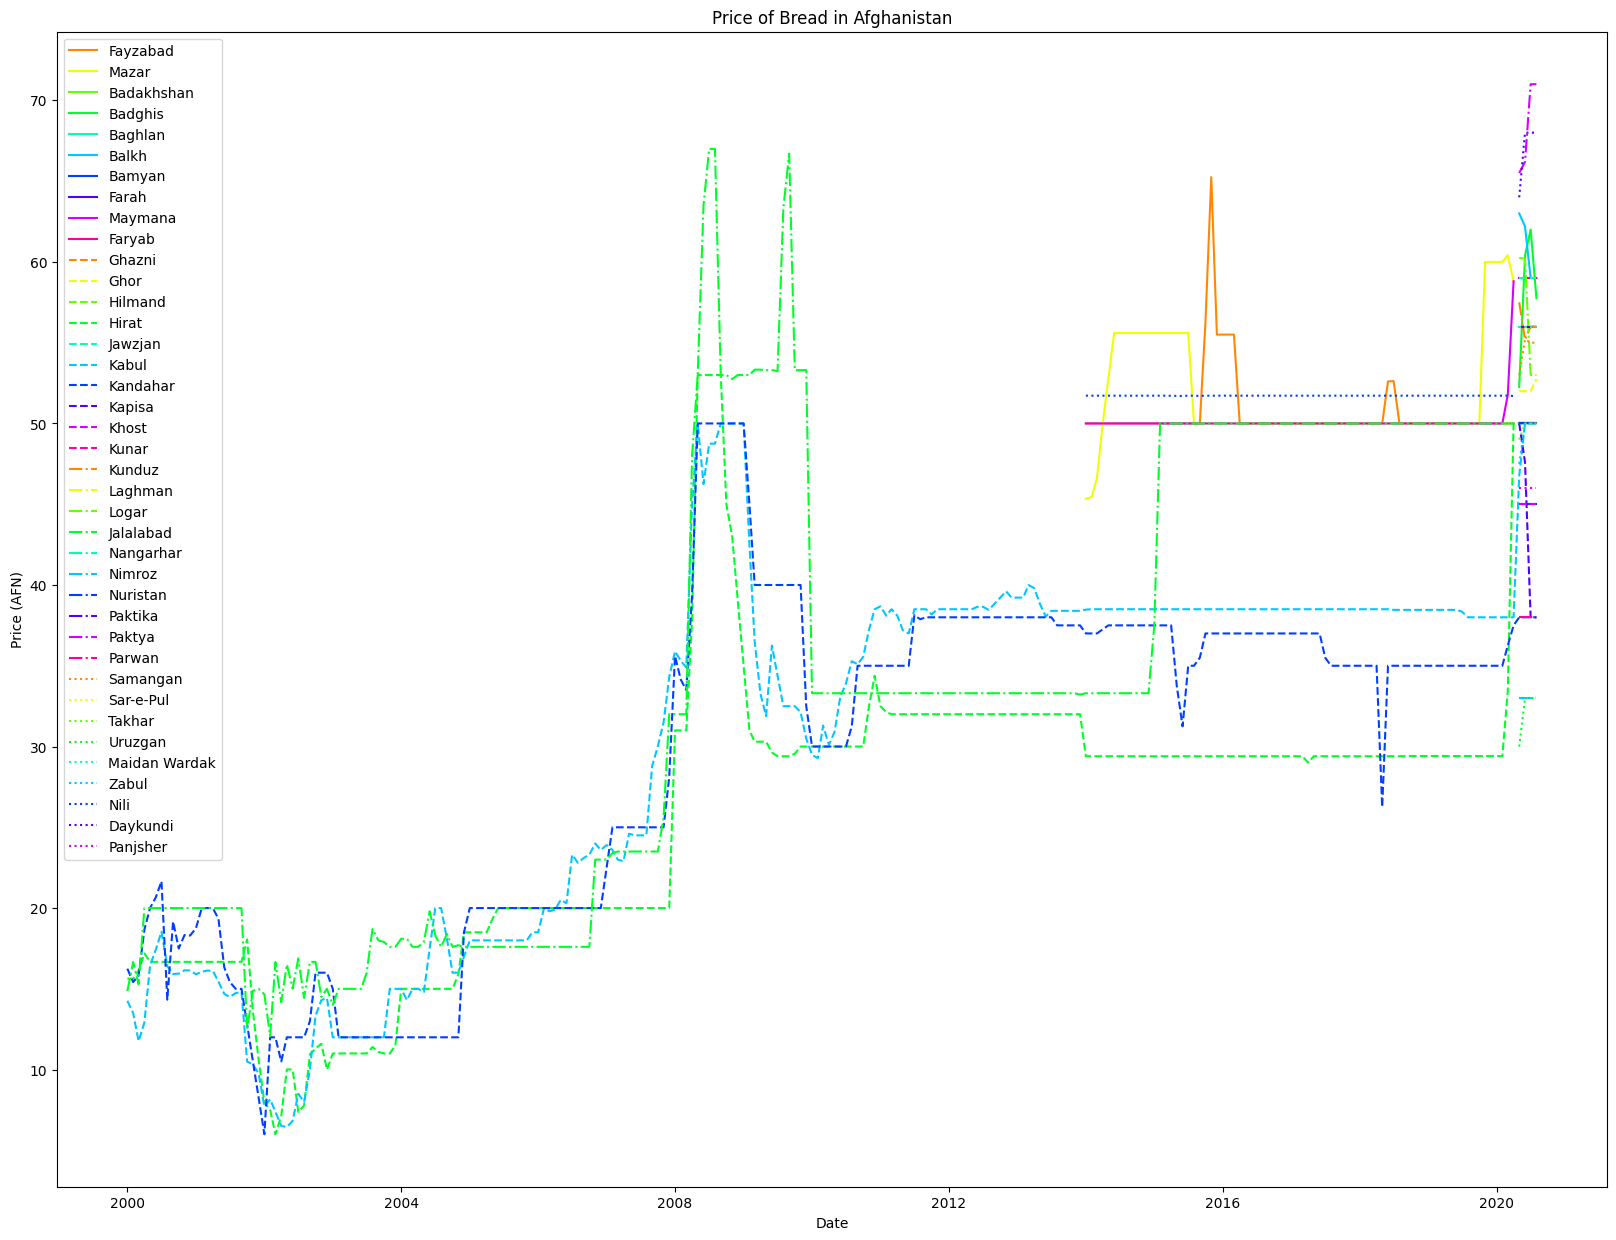

In [32]:
import math

# a constant which consists of the various line styles we wish to use in our drawn graphs
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']

def DrawGraph(country, product):
    """
    Generate a line graph of the changes in prices of a product for each City/Market within a given country.
    Ensures that each city is represented by a unique combo of colors + line styles.

    Parameters
    ----------
    country : str
        The name of the country to query
    product : str
        The name of the product to query

    Returns: None

    """

    # create a temporary dataframe of datapoints within given country for the given product
    tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    # creates a list of all unique cities within the above temporary dataframe
    cities = tempDF['City'].unique()

    #determines how many cities should be using a given Line style based on how many total cities are in the list
    sectionSize = math.ceil(len(cities) / len(LINE_STYLES))
    plt.figure(figsize=(20,15))

    # creates a list of hexcodes
    colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    hexColorIndex = 0
    lineStyleIndex = -1
    # for each unique city within the country, we want to plot the price change of the given product within that city over time.
    for label_num in range(len(cities)):
        label = cities[label_num]
        if label_num % (math.ceil(len(cities) / len(LINE_STYLES))) == 0:
            lineStyleIndex+=1
            hexColorIndex = 0

        productPriceCity = tempDF.loc[(tempDF['City']==label)]
        plt.plot(productPriceCity['Date'],productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);

        hexColorIndex += 1
    plt.legend()
    plt.title("Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.show()

DrawGraph('Afghanistan', 'Bread')

,Date,Country,Province/State,City,Product Name,Currency,Units of Measurement,Market Price,Market Price USD
1556631,2014-09-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93,1.93
1556632,2014-10-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93,1.93
1556633,2014-11-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93,1.93
1556634,2014-12-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.93,1.93
1556635,2015-02-01,Zimbabwe,Bulawayo,Renkini Bus Terminus,Oil (vegetable),USD,L,1.92,1.92
...,...,...,...,...,...,...,...,...,...
1560523,2018-03-01,Zimbabwe,Midlands,Matenda,Oil (vegetable),USD,L,2.25,2.25
1560531,2018-03-01,Zimbabwe,Midlands,Mutambi,Oil (vegetable),USD,L,2.25,2.25
1560539,2017-09-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,1.90,1.9
1560540,2018-03-01,Zimbabwe,Midlands,Vhugwi,Oil (vegetable),USD,L,2.50,2.5


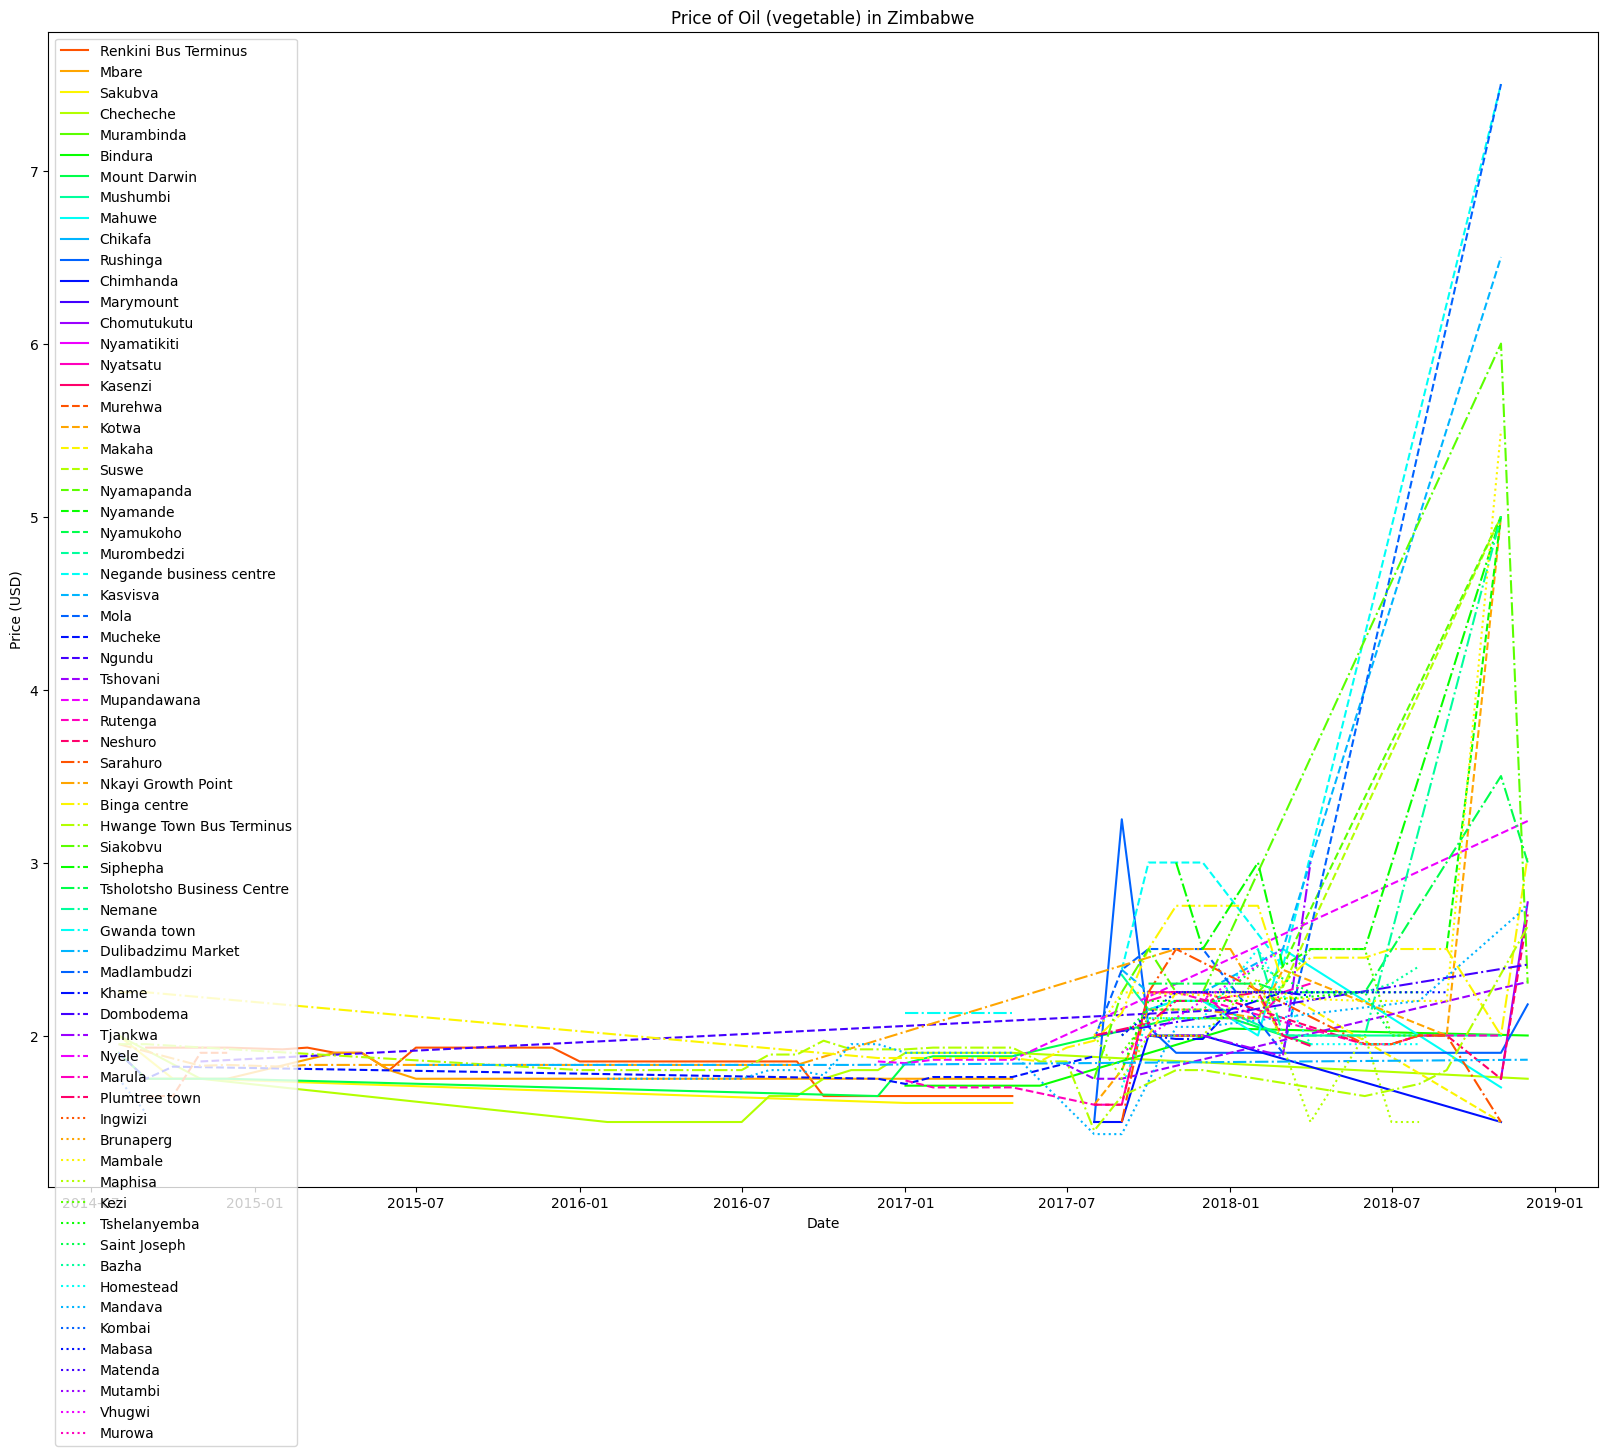

In [33]:
tempDF = df.loc[(df['Country']== 'Zimbabwe') & (df['Product Name']== 'Oil (vegetable)')]
display(tempDF)
DrawGraph('Zimbabwe', 'Oil (vegetable)')

In [37]:
def datetimeToFloat(d):
    epoch = dt.fromtimestamp(0)
    total_seconds =  (d - epoch.date()).total_seconds()
    return total_seconds

d = df['Date'][0]
datetimeToFloat(d)

dataframe =df['Date']
# display(dataframe)

datesInSeconds = dataframe.apply(datetimeToFloat)
display(dataframe)
display(datesInSeconds)

0          2014-01-01
1          2014-02-01
2          2014-03-01
3          2014-04-01
4          2014-05-01
              ...    
1560546    2017-09-01
1560547    2018-03-01
1560548    2018-03-01
1560549    2018-03-01
1560550    2018-03-01
Name: Date, Length: 1417492, dtype: object

0          1.388621e+09
1          1.391299e+09
2          1.393718e+09
3          1.396397e+09
4          1.398989e+09
               ...     
1560546    1.504310e+09
1560547    1.519949e+09
1560548    1.519949e+09
1560549    1.519949e+09
1560550    1.519949e+09
Name: Date, Length: 1417492, dtype: float64

In [38]:
def DrawAverageGraph(country, product):
    tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    # cities = tempDF['City'].unique()
    # sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # print(len(tempDF['City'].unique()))
    # print(sectionSize)
    plt.figure(figsize=(20,15))

    # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    #colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    hexColorIndex = 0
    lineStyleIndex = -1

    #Create empty df with Date, province, market, price
    test =  tempDF.groupby('Date').mean()
    test = test.reset_index()
    display(test)

    # for label_num in range(len(cities)):
    #     # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
    #     label = cities[label_num]
    #     if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
    #         lineStyleIndex+=1
    #         hexColorIndex = 0


        # productPriceCity = tempDF.loc[(tempDF['City']==label)]
        # sns.regplot(x=productPriceCity['Date'].apply(datetimeToFloat),y=productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], logx=True);
        # sns.regplot(x=test['Date'].apply(datetimeToFloat),y=test['Market Price'],label=label, color=colorRGBlist[hexColorIndex]);
    plt.plot(test['Date'].apply(datetimeToFloat),test['Market Price'],label=label, color='black');




        #hexColorIndex += 1
    plt.legend()
    plt.title("Average Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.show()

country = "Afghanistan"
product = "Bread"
DrawAverageGraph(country, product)

TypeError: agg function failed [how->mean,dtype->object]

<Figure size 2000x1500 with 0 Axes>

In [39]:
from sklearn.linear_model import LinearRegression

def scatterGraph(country, product):
    model = LinearRegression()
    tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    test =  tempDF.groupby('Date').mean()
    cities = tempDF['City'].unique()
    sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # print(len(tempDF['City'].unique()))
    # print(sectionSize)
    plt.figure(figsize=(20,15))

    # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    hexColorIndex = 0
    lineStyleIndex = -1
    for label_num in range(len(cities)):
        # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
        label = cities[label_num]
        if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
            lineStyleIndex+=1
            hexColorIndex = 0


        productPriceCity = tempDF.loc[(tempDF['City']==label)]
        plt.scatter(productPriceCity['Date'],productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex]);

        hexColorIndex += 1
    plt.plot(test['Date'],test[] )
    plt.legend()
    plt.title("Price of {} in {}".format(product, country))
    plt.xlabel("Date")
    plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.show()

scatterGraph('Afghanistan', 'Bread')

SyntaxError: invalid syntax (1695237103.py, line 30)

In [43]:
# Goal: Every Average for every counrty for ONE product
def GraphAverages(product, countries = df['Country'].unique()):



    # sectionSize = math.ceil(len(countries) / NUM_STYLES)
    # colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)
    colorRGBlist = sns.color_palette(palette='hsv', n_colors=30)
    hexColorIndex = 0
    lineStyleIndex = 0

    plt.figure(figsize=(20,15))
    for country in countries:

        if hexColorIndex == len(colorRGBlist):
            hexColorIndex = 0
            lineStyleIndex += 1

        tempDF = df.loc[(df['Country']== country) & (df['Product Name']== product)]
        if tempDF.empty:
            continue;
        tempDF_AverageMarketPrice =  tempDF.groupby('Date')['Market Price USD'].mean()
        tempDF_AverageMarketPrice = tempDF_AverageMarketPrice.reset_index()

        #Graph it
        # plt.plot(tempDF_AverageMarketPrice['Date'].apply(datetimeToFloat),tempDF_AverageMarketPrice['Market Price'],label=country, color='black', );
        plt.plot(tempDF_AverageMarketPrice['Date'].apply(datetimeToFloat),tempDF_AverageMarketPrice['Market Price'],label=country, color=colorRGBlist[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);

        hexColorIndex += 1

        # plt.title("Average Price of {} in {}".format(product, country))
        # plt.xlabel("Date")
        # plt.ylabel("Price ({})".format(tempDF['Currency'].unique()[0]))
    plt.legend()
    plt.show()



    # DF_ProductDetails = df.loc[(df['Country']== country) & (df['Product Name']== product)]
    # cities = DF_ProductDetails['City'].unique()
    # sectionSize = math.ceil(len(cities) / NUM_STYLES)
    # # print(len(tempDF['City'].unique()))
    # # print(sectionSize)
    # plt.figure(figsize=(20,15))

    # # colorRGBlist = sns.color_palette(palette='gist_rainbow',n_colors = sectionSize)
    # colorRGBlist = sns.color_palette(palette='hsv',n_colors = sectionSize)

    # hexColorIndex = 0
    # lineStyleIndex = -1

    # #Create empty df with Date, province, market, price
    # # display(DF_ProductDetails)
    # DF_AverageMarketPrice =  DF_ProductDetails.groupby('Date')['Market Price'].mean()
    # DF_AverageMarketPrice = DF_AverageMarketPrice.reset_index()
    # # display(test)

    # for label_num in range(len(cities)):
    #     # print("label_num % (math.ceil(len(cities) / NUM_STYLES)) = {0}".format(label_num % (math.ceil(len(cities) / NUM_STYLES))))
    #     label = cities[label_num]
    #     if label_num % (math.ceil(len(cities) / NUM_STYLES)) == 0:
    #         lineStyleIndex+=1
    #         hexColorIndex = 0


    #     productPriceCity = DF_ProductDetails.loc[(DF_ProductDetails['City']==label)]
    #     plt.plot(productPriceCity['Date'].apply(datetimeToFloat),productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], linestyle=LINE_STYLES[lineStyleIndex]);
    #     # sns.regplot(x=productPriceCity['Date'].apply(datetimeToFloat),y=productPriceCity['Market Price'],label=label, color=colorRGBlist[hexColorIndex], logx=True);
    #     # sns.regplot(x=DF_AverageMarketPrice['Date'].apply(datetimeToFloat),y=DF_AverageMarketPrice['Market Price'],label=label, color=colorRGBlist[hexColorIndex]);
    #     hexColorIndex += 1
    # plt.plot(DF_AverageMarketPrice['Date'].apply(datetimeToFloat),DF_AverageMarketPrice['Market Price'],label="Average", color='black');

        
    # plt.legend()
    # plt.title("Average Price of {} in {}".format(product, country))
    # plt.xlabel("Date")
    # plt.ylabel("Price ({})".format(DF_ProductDetails['Currency'].unique()[0]))
    # plt.show()
        
countries = ("Afghanistan", "Tajikistan")
country = "Afghanistan"
product = "Bread"
# product = "Exchange rate"
GraphAverages(product, [country])
print(type(df['Country'].unique()))
GraphAverages(product)
GraphAverages(product, countries)


TypeError: agg function failed [how->mean,dtype->object]

<Figure size 2000x1500 with 0 Axes>

# Wishlist
Currency Conversion (creating our own package - probably)
- Use US Treasury Fiscal Data report by quarters
- Round to nearest/next quarter for dates?
- Be able to understand different abbrevations of currencies

Graphs:
- [X] Price of item in a country (different lines represent different markets) 
- [ ] Average price of each item in a country (different lines/colors represent different products)
- [ ] Global price rates of W.H.O. Staple foods (i.e. corn, rice,potato)

Some way to input what we want to see (i.e. 'rice','global')

Some way to collate the datapoints of a single product in a single country to one line (regression? ML? )

 -> everntually graph all products in one country